In [3]:
import math

def lab2rgb(l_s, a_s, b_s):
    var_Y = (l_s + 16) / 116.0
    var_X = a_s / 500.0 + var_Y
    var_Z = var_Y - b_s / 200.0

    if var_Y**3 > 0.008856:
        var_Y = var_Y**3
    else:
        var_Y = (var_Y - 16/116) / 7.787
    if var_X**3 > 0.008856:
        var_X = var_X**3
    else:
        var_X = (var_X - 16/116) / 7.787
    if var_Z**3 > 0.008856:
        var_Z = var_Z**3
    else:
        var_Z = (var_Z - 16/116) / 7.787

    X = 95.047 * var_X
    Y = 100.000 * var_Y
    Z = 108.883 * var_Z

    var_X = X / 100.0
    var_Y = Y / 100.0
    var_Z = Z / 100.0

    var_R = var_X * 3.2406 + var_Y * -1.5372 + var_Z * -0.4986
    var_G = var_X * -0.9689 + var_Y * 1.8758 + var_Z * 0.0415
    var_B = var_X * 0.0557 + var_Y * -0.2040 + var_Z * 1.0570

    if var_R > 0.0031308:
        var_R = 1.055 * (var_R ** (1/2.4)) - 0.055
    else:
        var_R = 12.92 * var_R
    if var_G > 0.0031308:
        var_G = 1.055 * (var_G ** (1/2.4)) - 0.055
    else:
        var_G = 12.92 * var_G
    if var_B > 0.0031308:
        var_B = 1.055 * (var_B ** (1/2.4)) - 0.055
    else:
        var_B = 12.92 * var_B

    R = var_R * 255.0
    G = var_G * 255.0
    B = var_B * 255.0

    return R, G, B

# 이 함수는 주어진 L*a*b* 값을 RGB 값으로 변환합니다.
# 예를 들어:
R, G, B = lab2rgb(25.42, 8.9475, -22.77125)
print(R, G, B)


53.07723315495199 57.46896050808887 94.70754149923732


In [4]:
import pandas as pd

In [10]:
data= pd.read_csv("/Users/b32/Desktop/ㅇㅇㅇㅇㅇㅇ/배합비율의따른변화.csv")

In [12]:
dix_test = data.iloc[:, -3:]

In [13]:
dix_test

,색상_L*,색상_a*,색상_b*
0,44.5425,61.140,20.1475
1,44.7500,61.640,20.4875
2,44.7550,61.725,20.2600
3,44.7350,61.660,20.5050


In [14]:
# dix_test의 인덱스를 열로 변환
dix_test['index'] = dix_test.index

# RGB 데이터프레임 생성
rgb_list = []
for index, row in dix_test.iterrows():
    R, G, B = lab2rgb(row["색상_L*"], row["색상_a*"], row["색상_b*"])
    rgb_list.append([R, G, B])

rgb_df_test = pd.DataFrame(rgb_list, index=dix_test.index, columns=["R", "G", "B"])

# 원래 데이터프레임에 RGB 데이터프레임을 연결합니다.
df_rgb_test = pd.concat([dix_test, rgb_df_test], axis=1)

# 결과 출력
df_rgb_test


,색상_L*,색상_a*,색상_b*,index,R,G,B
0,44.5425,61.140,20.1475,0,197.938166,42.711188,75.409291
1,44.7500,61.640,20.4875,1,199.256438,42.255279,75.377736
2,44.7550,61.725,20.2600,2,199.322800,42.103203,75.760410
3,44.7350,61.660,20.5050,3,199.237935,42.153490,75.316379


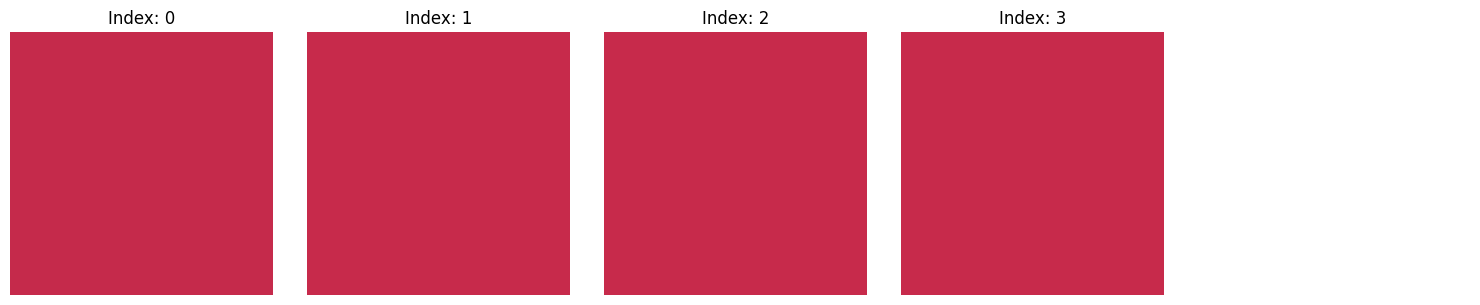

In [16]:
import matplotlib.pyplot as plt
import numpy as np  # numpy 임포트 추가
# 데이터프레임의 'R', 'G', 'B' 컬럼만 정규화합니다.
df_rgb_normalized = df_rgb_test[['R', 'G', 'B']] / 255

# 서브플롯의 크기를 결정합니다. 여기서는 5개의 열을 갖는 그리드로 설정합니다.
n_rows = len(df_rgb_normalized) // 5 + 1
n_cols = 5

# 시각화를 위한 준비
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*3))  # 전체 그림의 크기를 조정합니다.

# axs가 1차원 배열인 경우 2차원 배열로 변환합니다.
if n_rows == 1:
    axs = np.array([axs])

# 모든 서브플롯을 순회하며 RGB 색상을 표시합니다.
for i, (index, row) in enumerate(df_rgb_normalized.iterrows()):
    ax = axs[i // n_cols, i % n_cols]
    ax.imshow([[row.values]])  # RGB 색상으로 사각형을 그립니다.
    ax.set_title(f'Index: {index}')  # 서브플롯 위에 데이터프레임 인덱스를 표시합니다.
    ax.axis('off')  # 축을 숨깁니다.

# 남은 서브플롯을 숨깁니다.
for j in range(i+1, n_rows*n_cols):
    axs[j // n_cols, j % n_cols].axis('off')

plt.tight_layout()
plt.show()


In [25]:
data2= pd.read_csv("/Users/b32/Desktop/ㅇㅇㅇㅇㅇㅇ/블렉/sy회사블렉_빙초산0.2_96/시트 2-표 1.csv")

In [32]:
dix_test = data2.iloc[:, -3:]

In [33]:
dix_test

,색상_L*,색상_a*,색상_b*
0,70.7865,-1.2250,-2.6225
1,70.6475,-1.3130,-2.3675
2,70.8815,-1.2150,-2.3600
3,70.8650,-1.2365,-2.4415
4,70.8750,-1.2440,-2.4290
5,70.9490,-1.2265,-2.3775
6,71.0640,-1.2040,-2.3815


In [35]:
# dix_test의 인덱스를 열로 변환
dix_test['index'] = dix_test.index

# RGB 데이터프레임 생성
rgb_list = []
for index, row in dix_test.iterrows():
    R, G, B = lab2rgb(row["색상_L*"], row["색상_a*"], row["색상_b*"])
    rgb_list.append([R, G, B])

rgb_df_test = pd.DataFrame(rgb_list, index=dix_test.index, columns=["R", "G", "B"])

# 원래 데이터프레임에 RGB 데이터프레임을 연결합니다.
df_rgb_test2 = pd.concat([dix_test, rgb_df_test], axis=1)

# 결과 출력
df_rgb_test2


,색상_L*,색상_a*,색상_b*,index,R,G,B
0,70.7865,-1.2250,-2.6225,0,168.466022,174.061021,177.834066
1,70.6475,-1.3130,-2.3675,1,168.150384,173.717455,176.995857
2,70.8815,-1.2150,-2.3600,2,168.979345,174.292706,177.619132
3,70.8650,-1.2365,-2.4415,3,168.818539,174.266299,177.720503
4,70.8750,-1.2440,-2.4290,4,168.841873,174.296652,177.724847
5,70.9490,-1.2265,-2.3775,5,169.121978,174.482749,177.833145
6,71.0640,-1.2040,-2.3815,6,169.471837,174.780789,178.152701


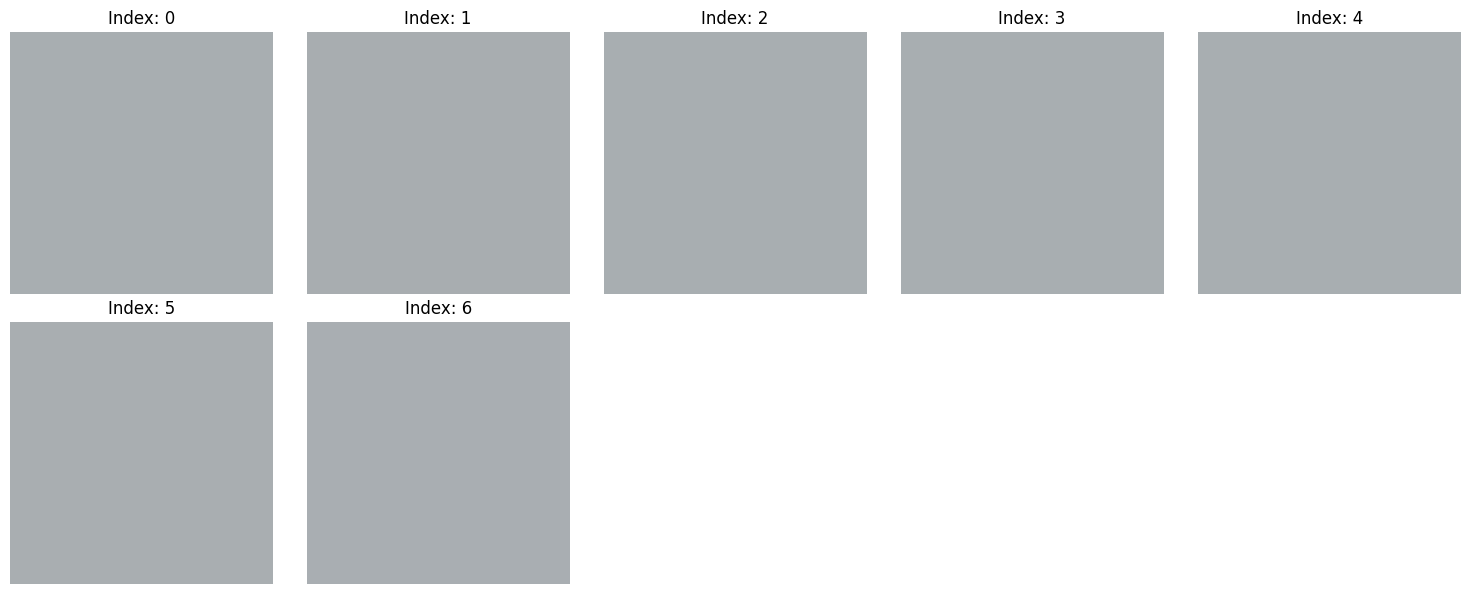

In [36]:
import matplotlib.pyplot as plt
import numpy as np  # numpy 임포트 추가
# 데이터프레임의 'R', 'G', 'B' 컬럼만 정규화합니다.
df_rgb_normalized = df_rgb_test2[['R', 'G', 'B']] / 255

# 서브플롯의 크기를 결정합니다. 여기서는 5개의 열을 갖는 그리드로 설정합니다.
n_rows = len(df_rgb_normalized) // 5 + 1
n_cols = 5

# 시각화를 위한 준비
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*3))  # 전체 그림의 크기를 조정합니다.

# axs가 1차원 배열인 경우 2차원 배열로 변환합니다.
if n_rows == 1:
    axs = np.array([axs])

# 모든 서브플롯을 순회하며 RGB 색상을 표시합니다.
for i, (index, row) in enumerate(df_rgb_normalized.iterrows()):
    ax = axs[i // n_cols, i % n_cols]
    ax.imshow([[row.values]])  # RGB 색상으로 사각형을 그립니다.
    ax.set_title(f'Index: {index}')  # 서브플롯 위에 데이터프레임 인덱스를 표시합니다.
    ax.axis('off')  # 축을 숨깁니다.

# 남은 서브플롯을 숨깁니다.
for j in range(i+1, n_rows*n_cols):
    axs[j // n_cols, j % n_cols].axis('off')

plt.tight_layout()
plt.show()
